In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cols = ['erythema', 'scaling', 'borders', 'itching', 'koebner', 'polygonal_p', 'follicular_p', 'mucosal', 'knee', 'scalp', 'melanin', 'eosinophils', 'PNL', 'fibrosis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing', 'elongation', 'thinning', 'spongiform', 'munro', 'focal', 'disappearance', 'vacuolisation',  'spongiosis', 'saw_tooth', 'follicular_h', 'perifollicular',  'inflammatory', 'band_like', 'age','y']
df = pd.read_csv('dermatology.data', sep=',', header=0, names=cols)
df

,erythema,scaling,borders,itching,koebner,polygonal_p,follicular_p,mucosal,knee,scalp,...,disappearance,vacuolisation,spongiosis,saw_tooth,follicular_h,perifollicular,inflammatory,band_like,age,y
3,3,3,2,1,0,0,0,1,1,1,...,0,0,0,0,0,0,1,0,8,1
2,1,2,3,1,3,0,3,0,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,0,0,0,0,0,3,2,0,...,3,0,0,0,0,0,3,0,40,1
2,3,2,2,2,2,0,2,0,0,0,...,2,3,2,3,0,0,2,3,45,3
2,3,2,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,1,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
3,2,1,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
3,2,2,2,3,2,0,2,0,0,0,...,0,3,0,3,0,0,2,3,28,3
2,1,3,1,2,3,0,2,0,0,0,...,0,2,0,1,0,0,2,3,50,3


In [4]:
df.columns

Index(['erythema', 'scaling', 'borders', 'itching', 'koebner', 'polygonal_p',
       'follicular_p', 'mucosal', 'knee', 'scalp', 'melanin', 'eosinophils',
       'PNL', 'fibrosis', 'exocytosis', 'acanthosis', 'hyperkeratosis',
       'parakeratosis', 'clubbing', 'elongation', 'thinning', 'spongiform',
       'munro', 'focal', 'disappearance', 'vacuolisation', 'spongiosis',
       'saw_tooth', 'follicular_h', 'perifollicular', 'inflammatory',
       'band_like', 'age', 'y'],
      dtype='object')

In [5]:
data = df.drop(columns=['age', 'y'])

In [6]:
from sklearn.decomposition import PCA

pca = PCA(3)

pca.fit(data)

new_data = pd.DataFrame(pca.transform(data), columns=['pc1', 'pc2', 'pc3'])

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

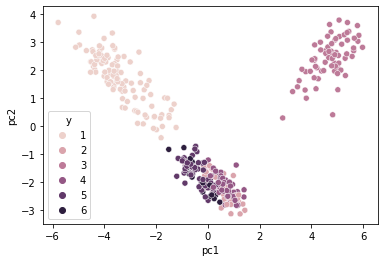

In [7]:
new_data['y'] = df['y'].tolist()


sns.scatterplot(data=new_data, x='pc1', y='pc2', hue='y')

In [10]:
import plotly.express as px
fig = px.scatter_3d(new_data, x='pc1', y='pc2', z='pc3', color='y')
fig.update_traces(marker=dict(size=5,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()
fig.write_image("fig1.png")
fig.write_image("fig1.pdf")